<a href="https://colab.research.google.com/github/kurkur19/Intelligent_Data_Analysis_Al_Khmuz_BS_25/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D0%86%D0%90%D0%94_%D0%91%D0%A1_25_%D0%90%D0%BB%D1%8C_%D0%A5%D0%BC%D1%83%D0%B7_%D0%9A%D0%9F_%E2%84%961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 1: Метрики відстані
### Дисципліна: Вступ до Інтелектуального Аналізу Даних

У даній роботі ми реалізували функції для розрахунку відстаней за чотирма основними метриками між двома точками на основі матриці властивостей.
Ми використали такі метрики:
1. Квадрат відстані Евкліда
2. Відстань Евкліда
3. Відстань Чебишева
4. Відстань Міньковського (p=3)

### Вхідні дані
Матриця властивостей містить інформацію про два об'єкти (квіти Iris virginica) з такими параметрами:
- Довжина чашолистка (см)
- Ширина чашолистка (см)
- Довжина пелюстки (см)
- Ширина пелюстки (см)

Метою є обчислення відстаней між цими двома об'єктами з використанням різної кількості параметрів (2, 3, і 4 параметри).


##Теоретична частина

**Метрика** — це спосіб вимірювання відстані між двома об'єктами, який дозволяє оцінити, наскільки вони схожі або відрізняються. Для того щоб метрика була коректною, вона повинна відповідати певним умовам: відстань між двома об'єктами повинна бути однаковою в обох напрямках, і якщо об'єкти ідентичні, їхня відстань повинна дорівнювати нулю. Метрики відіграють ключову роль у задачах класифікації, оскільки дозволяють групувати об'єкти за схожістю. Вони допомагають визначити, які об'єкти варто об'єднати в один кластер через їхню близькість, а які краще розділити через їхні відмінності.

Існує безліч способів обчислення відстані (метрик), але в рамках цієї роботи ми зосередимося на чотирьох основних:
- Квадрат відстані Евкліда
- Відстань Евкліда
- Відстань Чебишева
- Відстань Міньковського

###***Квадрат відстані Евкліда***

Квадрат відстані Евкліда (Евклідова міра) є однією з найпоширеніших метрик, яка вимірює відстань по прямій між двома точками в просторі. Вона представляє собою квадрат геометричної відстані між точками, що дозволяє оцінювати відстань без взяття кореня. В загальному випадку, Евклідова відстань використовується для вимірювання відстані між двома точками у n-вимірному просторі.

Нехай є дві точки \(a\) і \(b\), що належать \(X^n\) і представлені своїми координатами:  
\(a = (a_1, a_2, ..., a_n)\),  
\(b = (b_1, b_2, ..., b_n)\).  

Формула для квадрата Евклідової відстані має вигляд:  
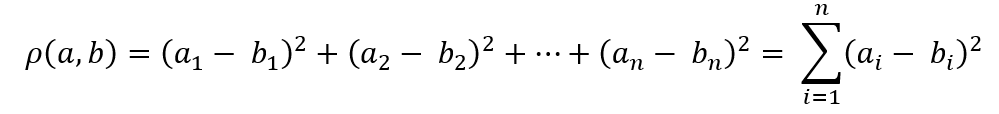

Ця метрика є основою багатьох алгоритмів класифікації та кластеризації, оскільки вона дозволяє вимірювати схожість об'єктів у багатовимірному просторі.

###***Відстань Евкліда***

Відстань Евкліда — це класична метрика, яка вимірює найкоротшу відстань між двома точками у просторі. Вона є узагальненням звичайної геометричної відстані між двома точками на площині або в тривимірному просторі на випадок будь-якої кількості вимірів.


Евклідова відстань обчислюється за попередньою формулою (Квадрат відстані Евкліда), тільки тут все треба занести під корінь  :)



Ця метрика надає інтуїтивне уявлення про відстань "по прямій" між об'єктами, що робить її дуже популярною в різних галузях науки та техніки. Евклідова відстань широко використовується в алгоритмах кластеризації та машинного навчання, де необхідно визначати схожість між багатовимірними об'єктами, такими як зображення, тексти або дані про клієнтів.

###***Відстань Чебишева***

**Відстань Чебишева** — це метрика, яка використовується для вимірювання відстані між двома точками в просторі, де об'єкти розрізняються найбільше за однією з координат. Вона особливо корисна в задачах, де важливо визначити два об'єкти як "різні", навіть якщо вони відрізняються лише за одним параметром.


Відстань Чебишева обчислюється за формулою:

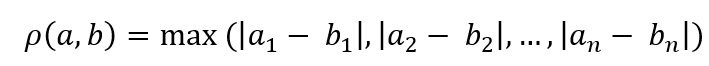

Це означає, що відстань між двома точками визначається найбільшою різницею між їх координатами. Іншими словами, результатом буде найбільший модуль різниці для однієї з координат. Відстань Чебишева часто застосовується в задачах, де важливо враховувати найбільші відхилення між об'єктами.

###***Відстань Міньковського***

Відстань Міньковського — це узагальнення кількох інших метрик, таких як Евклідова і Манхеттенська. Вона дозволяє контролювати, наскільки сильно враховуються різниці між координатами об'єктів, залежно від параметра
𝑝
p.

Простими словами, відстань Міньковського допомагає виміряти, наскільки два об'єкти відрізняються, але можна налаштувати спосіб, яким це вимірюється, змінюючи параметр
𝑝:

Якщо 𝑝 = 1, це перетворюється на Манхеттенську відстань — сума абсолютних різниць між координатами (вимірювання по "сітці", як у місті з перпендикулярними вулицями).

Якщо 𝑝 = 2, це дає Евклідову відстань — стандартну відстань по прямій між двома точками.

Якщо 𝑝 більше за 2, то відстань наголошує більше на великих різницях між координатами.

Формула відстані Міньковського:

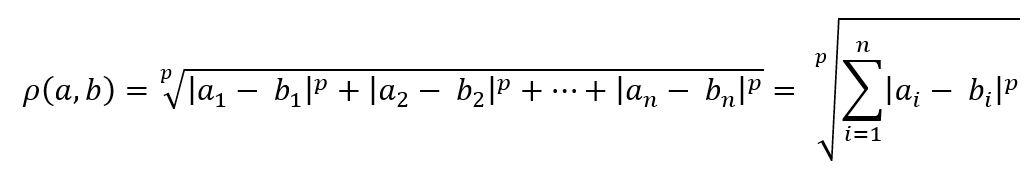

##Практична частина

Я, Аль Хмуз Карина Бассамівна, маю перший варіант в своїй группі БС-25. Ось мої данні:

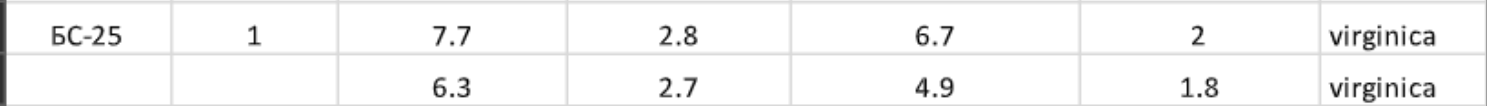


Що ж, після того, як ми зрозуміли що і як правильно обчислюються наші чотири відстані, можемо приступати до практичної частини.

###Імпорт бібліотек

In [13]:
import numpy as np
import pandas as pd

In [12]:
# Матриця даних
data = np.array([
    [7.7, 2.8, 6.7, 2.0],  # Точка 1
    [6.3, 2.7, 4.9, 1.8]   # Точка 2
])

# Функція для розрахунку квадрату відстані Евкліда
def euclidean_squared_distance(point1, point2):
    return np.sum((point1 - point2) ** 2)

# Функція для розрахунку відстані Евкліда
def euclidean_distance(point1, point2):
    return np.sqrt(euclidean_squared_distance(point1, point2))

# Функція для розрахунку відстані Чебишева
def chebyshev_distance(point1, point2):
    return np.max(np.abs(point1 - point2))

# Функція для розрахунку відстані Міньковського
def minkowski_distance(point1, point2, p=3):
    return np.sum(np.abs(point1 - point2) ** p) ** (1/p)

# Функція для перевірки вхідних даних
def validate_input(data):
    # Перевіряємо, що дані мають правильний формат
    if not isinstance(data, np.ndarray):
        raise ValueError("Дані повинні бути у вигляді numpy масиву")
    if data.shape[0] != 2:
        raise ValueError("Матриця повинна містити два рядки (точки)")
    if data.shape[1] < 2:
        raise ValueError("Матриця повинна містити щонайменше два стовпці (параметри)")

# Створимо функцію для обчислення відстаней за всіма метриками з можливістю задавати p
def calculate_distances(data, p=3):
    # Перевірка вхідних даних
    validate_input(data)

    # Створення структури для зберігання результатів
    distances = {'Metric': ['Euclidean Squared', 'Euclidean', 'Chebyshev', f'Minkowski (p={p})']}

    # Для 2, 3 та 4 параметрів
    for n_params in range(2, 5):
        point1 = data[0][:n_params]
        point2 = data[1][:n_params]

        # Обчислення відстаней для різних метрик
        distances[f'{n_params} parameters'] = [
            euclidean_squared_distance(point1, point2),
            euclidean_distance(point1, point2),
            chebyshev_distance(point1, point2),
            minkowski_distance(point1, point2, p)
        ]

    # Повертаємо результат у вигляді таблиці
    return pd.DataFrame(distances)

# Обчислюємо відстані для стандартного випадку з p=3
distance_table = calculate_distances(data, p=3)
print("Результати обчислень (p=3):")
print(distance_table)

# Обчислюємо відстані для випадку з p=4
distance_table_p4 = calculate_distances(data, p=4)
print("\nРезультати обчислень (p=4):")
print(distance_table_p4)


Результати обчислень (p=3):
              Metric  2 parameters  3 parameters  4 parameters
0  Euclidean Squared      1.970000      5.210000      5.250000
1          Euclidean      1.403567      2.282542      2.291288
2          Chebyshev      1.400000      1.800000      1.800000
3    Minkowski (p=3)      1.400170      2.046972      2.047608

Результати обчислень (p=4):
              Metric  2 parameters  3 parameters  4 parameters
0  Euclidean Squared      1.970000      5.210000      5.250000
1          Euclidean      1.403567      2.282542      2.291288
2          Chebyshev      1.400000      1.800000      1.800000
3    Minkowski (p=4)      1.400009      1.945951      1.946006


###Пояснення результатів обчислень відстаней

В даному коді було проведено обчислення відстаней між двома точками в чотиривимірному просторі за допомогою чотирьох різних метрик: квадрат відстані Евкліда, відстань Евкліда, відстань Чебишева та відстань Міньковського. Нижче наведено пояснення результатів обчислень.

Вхідні дані
Ми розглядаємо дві точки, представлені у вигляді масиву NumPy:

Точка 1: [7.7, 2.8, 6.7, 2.0]

Точка 2: [6.3, 2.7, 4.9, 1.8]

Результати обчислень (p=3):

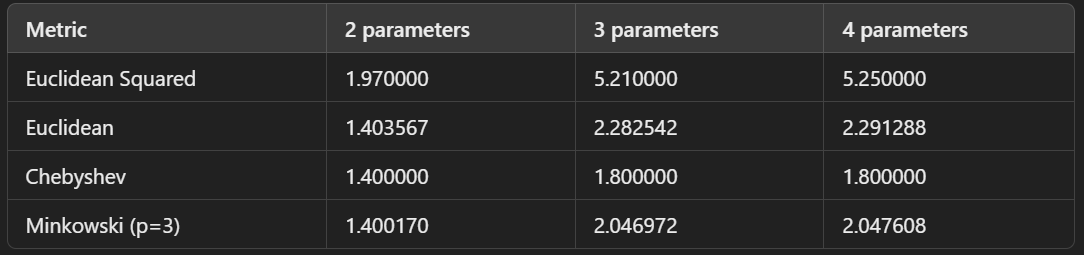

Результати обчислень (p=4):

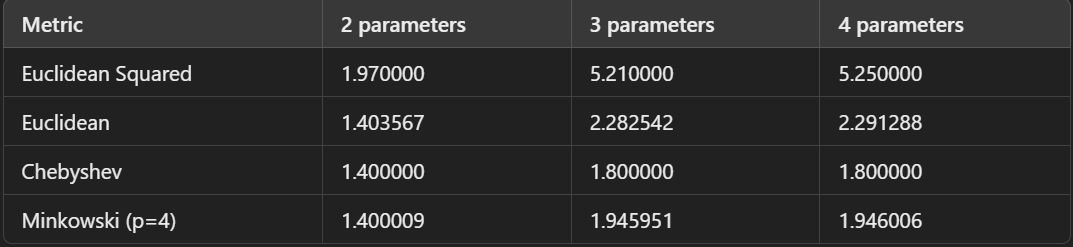

У нашому програмному застосунку ми використовуємо параметр
𝑝
для обчислення відстані за метрикою Міньковського, яка є узагальненням інших метрик, зокрема Евкліда та Чебишева.

###***Вибір значень 𝑝 = 3 і  𝑝 = 4***


***Параметр 𝑝 = 3:***

Вибір 𝑝 = 3
дозволяє нам врахувати вплив відстані між точками в тривимірному просторі. Це забезпечує збалансовану чутливість до відхилень між координатами, адже великі відхилення в одній з координат більше впливають на загальну відстань.
Міньковський з 𝑝 = 3
також є досить популярним варіантом для практичного використання, оскільки він забезпечує оптимальний баланс між чутливістю до аномалій і загальною простотою обчислення.

***Параметр 𝑝 = 4:***

Збільшення 𝑝 до 4 робить метрику більш чутливою до великих відхилень. Це може бути корисно в ситуаціях, коли важливі екстремальні значення в даних.

Вибір 𝑝 = 4 також дозволяє спостерігати за змінами в результатах, що може дати корисні інсайти щодо структури даних.

###ПЕРЕВІРКА

Давайте підставимо значення з нашої матриці даних у формули для кожної метрики і перевіримо результати:

Квадрат відстані Евкліда:
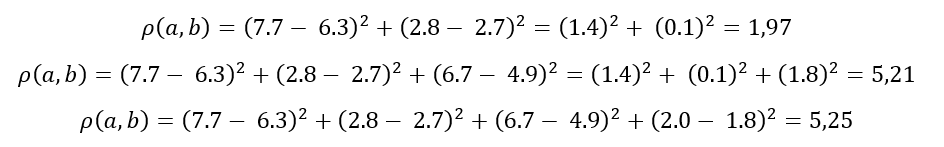

Відстань Евкліда(просто підставляємо наші попередні результати під корінь):

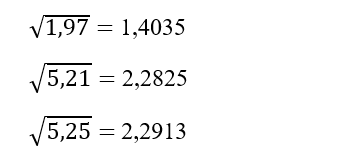

Відстань Чебишева (тут виконаю тільки одну перевірку):
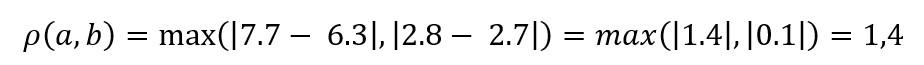

Відстань Міньковського (p = 3):
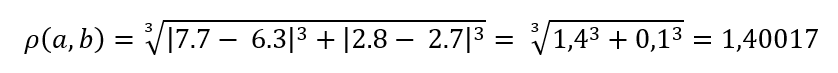

Відстань Міньковського (p = 4):
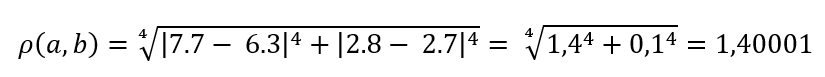

УРААА! 🎉 Ми успішно перевірили код і підтвердили його правильність. 🥰

###***Пояснення метрик***

*Euclidean Squared:*   

Вимірює квадрат відстані між двома точками. Чим більше значення, тим далі одна точка від іншої. Наприклад, для двох параметрів відстань дорівнює 1.970, для трьох — 5.210, а для чотирьох — 5.250.


*Euclidean:*  

Це стандартна метрика, яка повертає відстань між двома точками. Вона завжди менша за значення квадрату відстані. В нашому випадку, для двох параметрів відстань становить 1.404, для трьох — 2.283, а для чотирьох — 2.291.

*Chebyshev:*

Ця метрика визначає максимальну різницю між координатами точок. Значення для двох параметрів — 1.400, для трьох — 1.800, а для чотирьох — залишається на тому ж рівні (1.800). Це вказує на те, що максимальна різниця між координатами не змінюється з додаванням параметрів.

*Minkowski (p=3 і p=4):*

 Це узагальнена метрика, яка приймає параметр p, що визначає, як обчислюється відстань. Результати показують, що з ростом p значення відстаней збільшуються. Для p=3 відстань для двох параметрів становить 1.400, для трьох — 2.047, а для чотирьох — 2.048. Для p=4 результати теж схожі: 1.400 для двох параметрів, 1.946 для трьох, та 1.946 для чотирьох.

##**Висновок**
Результати показують, як відстані між точками змінюються в залежності від вибраної метрики та кількості параметрів. Це корисно для аналізу даних та може допомогти у розумінні схожості або відмінностей між різними об'єктами в багатовимірному просторі. Чим більше параметрів, тим точніше можуть бути обчислення відстаней, але при цьому можуть з'являтися нові відмінності, які потрібно враховувати.